In [1]:

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

import seaborn as sns
import nltk 
import warnings
warnings.filterwarnings('ignore')

from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


import re
import string
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB  

In [2]:
file_path_training = r'C:\Users\khawl\Desktop\5SAE2\PFE\CRM\backend\IA\DATASET\twitter_training.csv'
df_training = pd.read_csv(file_path_training, encoding='latin-1')  

file_path_validation= r'C:\Users\khawl\Desktop\5SAE2\PFE\CRM\backend\IA\DATASET\twitter_validation.csv'
df_validation = pd.read_csv(file_path_training, encoding='latin-1')  

print('twitter_training')
print(df_training.head())
print('twitter_validation')
print(df_validation.head())



twitter_training
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and i will murder you...     
3  im getting on borderlands 2 and i will murder ...     
4  im getting into borderlands and i can murder y...     
twitter_validation
   2401  Borderlands  Positive  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

  im getting on borderlands and i will murder you all ,  
0  I am coming to the borders and I will kill you...     
1  im getting on borderlands and i will kill you ...     
2  im coming on borderlands and 

In [3]:
df_training.columns = ['ID', 'Platform', 'Sentiment', 'Text']
df_validation.columns = ['ID', 'Platform', 'Sentiment', 'Text']



df_training[df_training['Sentiment'] == 'Positive'].head(5)
df_validation[df_validation['Sentiment'] == 'Negative'].head(5)


,ID,Platform,Sentiment,Text
23,2405,Borderlands,Negative,the biggest dissappoinment in my life came out...
24,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
25,2405,Borderlands,Negative,The biggest disappointment of my life came a y...
26,2405,Borderlands,Negative,the biggest dissappoinment in my life coming o...
27,2405,Borderlands,Negative,For the biggest male dissappoinment in my life...


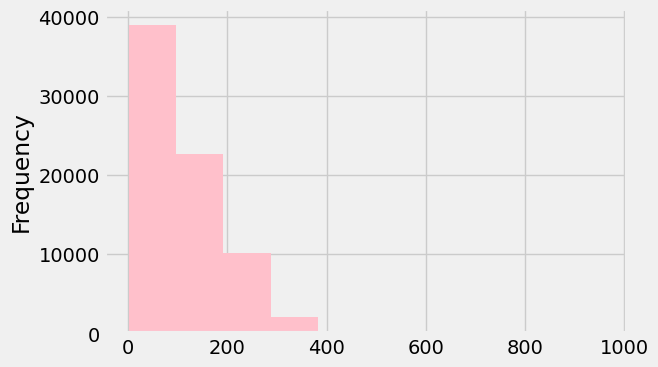

In [4]:

length_train = df_training['Text'].str.len().plot.hist(color = 'pink', figsize = (6, 4))



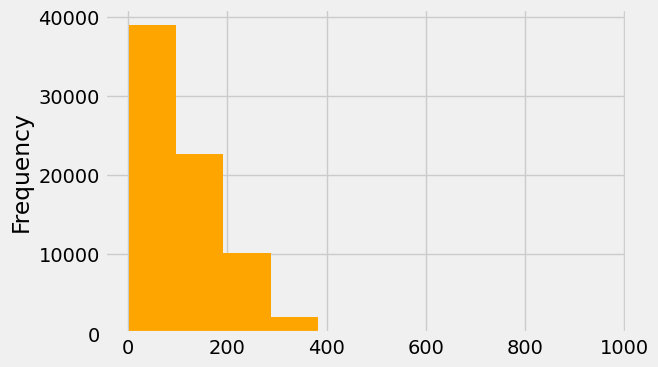

In [5]:
length_test = df_validation['Text'].str.len().plot.hist(color = 'orange', figsize = (6, 4))

In [6]:

# Remplacer les valeurs manquantes par une chaîne vide
df_training['Text'].fillna('', inplace=True)
df_validation['Text'].fillna('', inplace=True)

def clean_tweet(tweet):
    '''
    Fonction utilitaire pour nettoyer le texte des tweets en supprimant les liens, les caractères spéciaux
    à l'aide de simples expressions régulières.
    '''
    return ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)", " ", tweet).split())
    

df_training['Cleaned_Text'] = df_training['Text'].apply(clean_tweet)
df_validation['Cleaned_Text'] = df_validation['Text'].apply(clean_tweet)

df_training['Length'] = df_training['Text'].apply(len)
df_validation['Length'] = df_validation['Text'].apply(len)

print('Twitter Training ')
print(df_training.head())
print('\nTwitter Validation Dataset:')
print(df_validation.head())

Twitter Training 
     ID     Platform Sentiment  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                Text  \
0  I am coming to the borders and I will kill you...   
1  im getting on borderlands and i will kill you ...   
2  im coming on borderlands and i will murder you...   
3  im getting on borderlands 2 and i will murder ...   
4  im getting into borderlands and i can murder y...   

                                        Cleaned_Text  Length  
0  I am coming to the borders and I will kill you...      51  
1  im getting on borderlands and i will kill you all      50  
2  im coming on borderlands and i will murder you...      51  
3  im getting on borderlands 2 and i will murder ...      57  
4  im getting into borderlands and i can murder y...      53  

Twitter Validation Dataset:
     ID     Platform Sentiment  \

In [7]:

print('Twitter Training ')
df_training.groupby('Sentiment').describe()


Twitter Training 


ID                                                           \
              count         mean          std   min     25%     50%      75%   
Sentiment                                                                      
Irrelevant  12990.0  5928.771363  3616.510316   5.0  2942.0  5153.0   9369.0   
Negative    22542.0  6760.267767  3479.188211   1.0  3825.0  7105.0   9384.0   
Neutral     18318.0  6494.270881  3959.853892   3.0  3173.0  6904.0  10011.0   
Positive    20831.0  6338.113821  3850.921687  12.0  2755.0  6001.0   9708.5   

                      Length                                                  \
                max    count        mean        std  min   25%    50%    75%   
Sentiment                                                                      
Irrelevant  13200.0  12990.0  110.494996  79.778536  0.0  49.0   93.0  154.0   
Negative    13194.0  22542.0  110.881865  82.493775  0.0  45.0   91.0  161.0   
Neutral     13197.0  18318.0  118.104378  78.356355  0.0  61.0  105.0  161.0   
Positive    13198.0  20831.0   95.502328  77.808529  0.0  36.0   74.0  134.0   

                   
              max  
Sentiment          
Irrelevant  692.0  
Negative    727.0  
Neutral     957.0  
Positive    692.0

In [8]:
print('Twitter validation ')
df_validation.groupby('Sentiment').describe()

Twitter validation 


ID                                                           \
              count         mean          std   min     25%     50%      75%   
Sentiment                                                                      
Irrelevant  12990.0  5928.771363  3616.510316   5.0  2942.0  5153.0   9369.0   
Negative    22542.0  6760.267767  3479.188211   1.0  3825.0  7105.0   9384.0   
Neutral     18318.0  6494.270881  3959.853892   3.0  3173.0  6904.0  10011.0   
Positive    20831.0  6338.113821  3850.921687  12.0  2755.0  6001.0   9708.5   

                      Length                                                  \
                max    count        mean        std  min   25%    50%    75%   
Sentiment                                                                      
Irrelevant  13200.0  12990.0  110.494996  79.778536  0.0  49.0   93.0  154.0   
Negative    13194.0  22542.0  110.881865  82.493775  0.0  45.0   91.0  161.0   
Neutral     13197.0  18318.0  118.104378  78.356355  0.0  61.0  105.0  161.0   
Positive    13198.0  20831.0   95.502328  77.808529  0.0  36.0   74.0  134.0   

                   
              max  
Sentiment          
Irrelevant  692.0  
Negative    727.0  
Neutral     957.0  
Positive    692.0

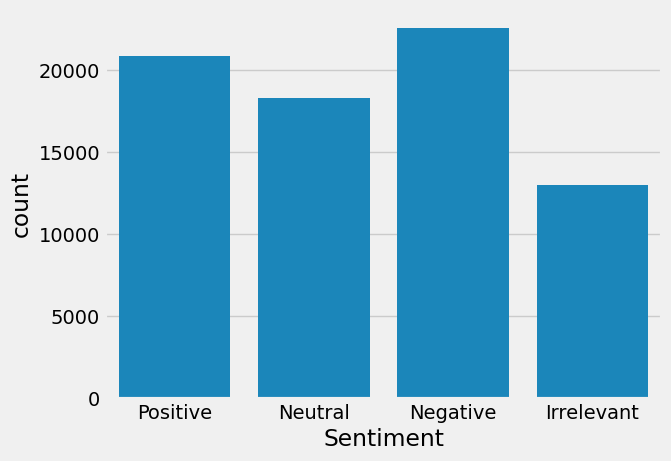

In [9]:
sns.countplot(x = 'Sentiment', data = df_training)
plt.show()

Text(0.5, 1.0, 'Most Frequently Occurring Words - Top 30')

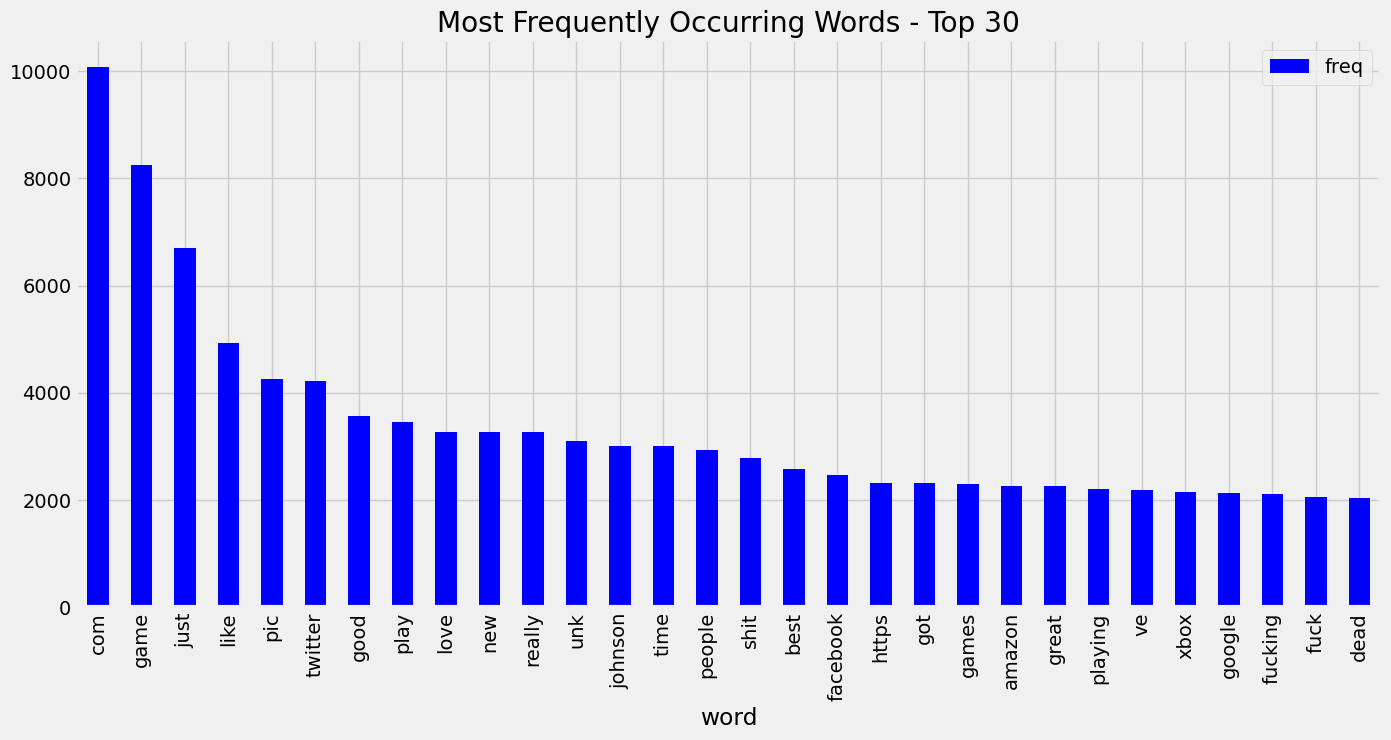

In [10]:
#Le paramètre stop_words='english' spécifie que les mots vides courants en anglais (comme "the", "and", "is", etc.)
#  doivent être ignorés.

vectorizer = CountVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(df_training['Text'])

sum_words = X1.sum(axis=0)

#vectorizer.vocabulary_ est un dictionnaire qui associe chaque mot à son index.
#  La compréhension de liste génère des tuples (mot, fréquence)
words_freq = [(X1, sum_words[0, i]) for X1, i in vectorizer.vocabulary_.items()]
words_freq = sorted(words_freq, key = lambda x: x[1], reverse = True)

frequency = pd.DataFrame(words_freq, columns=['word', 'freq'])
frequency.head(30).plot(x='word', y='freq', kind='bar', figsize=(15, 7), color='blue')

plt.title("Most Frequently Occurring Words - Top 30")





Text(0.5, 1.0, 'WordCloud - Vocabulary from Reviews')

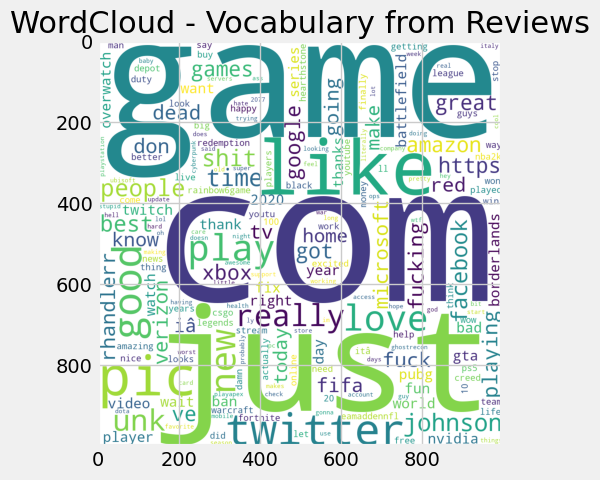

In [11]:
from wordcloud import WordCloud

wordcloud = WordCloud(background_color = 'white', width = 1000, height = 1000).generate_from_frequencies(dict(words_freq))

plt.figure(figsize=(5,5))
plt.imshow(wordcloud)
plt.title("WordCloud - Vocabulary from Reviews", fontsize = 22)

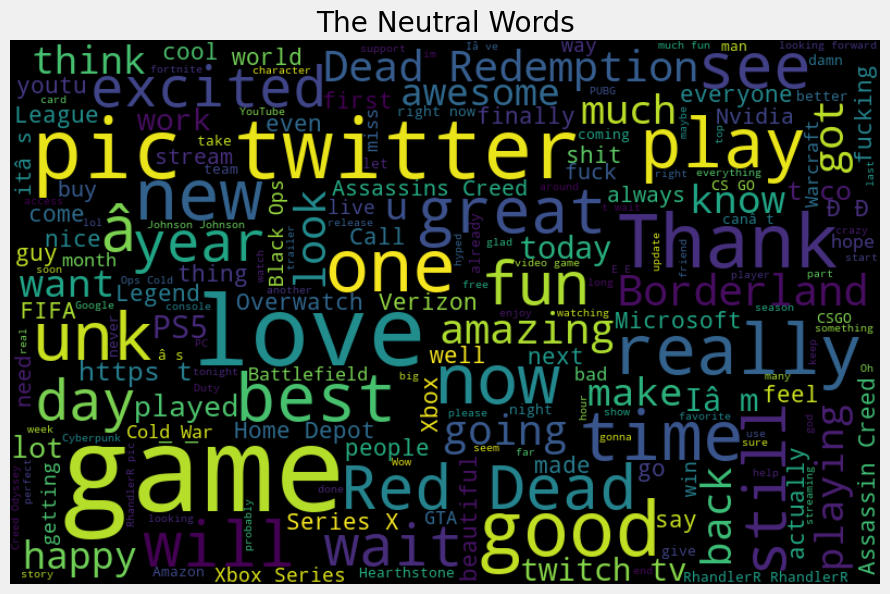

In [12]:
#Irrelevant Negative Neutral Positive
normal_words =' '.join([text for text in df_training['Text'][df_training['Sentiment'] == 'Positive']])

wordcloud = WordCloud(width=800, height=500, random_state = 0, max_font_size = 110).generate(normal_words)
plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.title('The Neutral Words')
plt.show()

In [13]:

df_training['Cleaned_Text'] = df_training['Text'].apply(lambda x: " ".join([w for w in x.split() if len(w) > 3]))

df_training.head()

,ID,Platform,Sentiment,Text,Cleaned_Text,Length
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"coming borders will kill all,",51
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"getting borderlands will kill all,",50
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"coming borderlands will murder all,",51
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"getting borderlands will murder all,",57
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,"getting into borderlands murder all,",53


In [14]:
tokenized_tweet = df_training['Cleaned_Text'].apply(lambda x: x.split())
from nltk.stem.porter import PorterStemmer
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda sentence: [stemmer.stem(word) for word in sentence])
tokenized_tweet.head()
for i in range(len(tokenized_tweet)):
    tokenized_tweet[i] = " ".join(tokenized_tweet[i])
    
df_training['Cleaned_Text'] = tokenized_tweet
df_training.head()

,ID,Platform,Sentiment,Text,Cleaned_Text,Length
0,2401,Borderlands,Positive,I am coming to the borders and I will kill you...,"come border will kill all,",51
1,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...,"get borderland will kill all,",50
2,2401,Borderlands,Positive,im coming on borderlands and i will murder you...,"come borderland will murder all,",51
3,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...,"get borderland will murder all,",57
4,2401,Borderlands,Positive,im getting into borderlands and i can murder y...,"get into borderland murder all,",53


In [15]:
X_train = vectorizer.fit_transform(df_training['Cleaned_Text'])
y_train = df_training['Sentiment']

X_validation = vectorizer.transform(df_validation['Cleaned_Text'])
y_validation = df_validation['Sentiment']

# Séparation des données d'entraînement pour les tests (optionnel)
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(X_train, y_train, test_size=0.3, random_state=100)






Multinomial NB - Accuracy: 0.73, Precision: 0.74, Recall: 0.73, F1 Score: 0.72
Logistic Regression - Accuracy: 0.80, Precision: 0.80, Recall: 0.80, F1 Score: 0.80
Support Vector Classifier - Accuracy: 0.83, Precision: 0.84, Recall: 0.83, F1 Score: 0.83
XGBoost - Accuracy: 0.60, Precision: 0.63, Recall: 0.60, F1 Score: 0.59


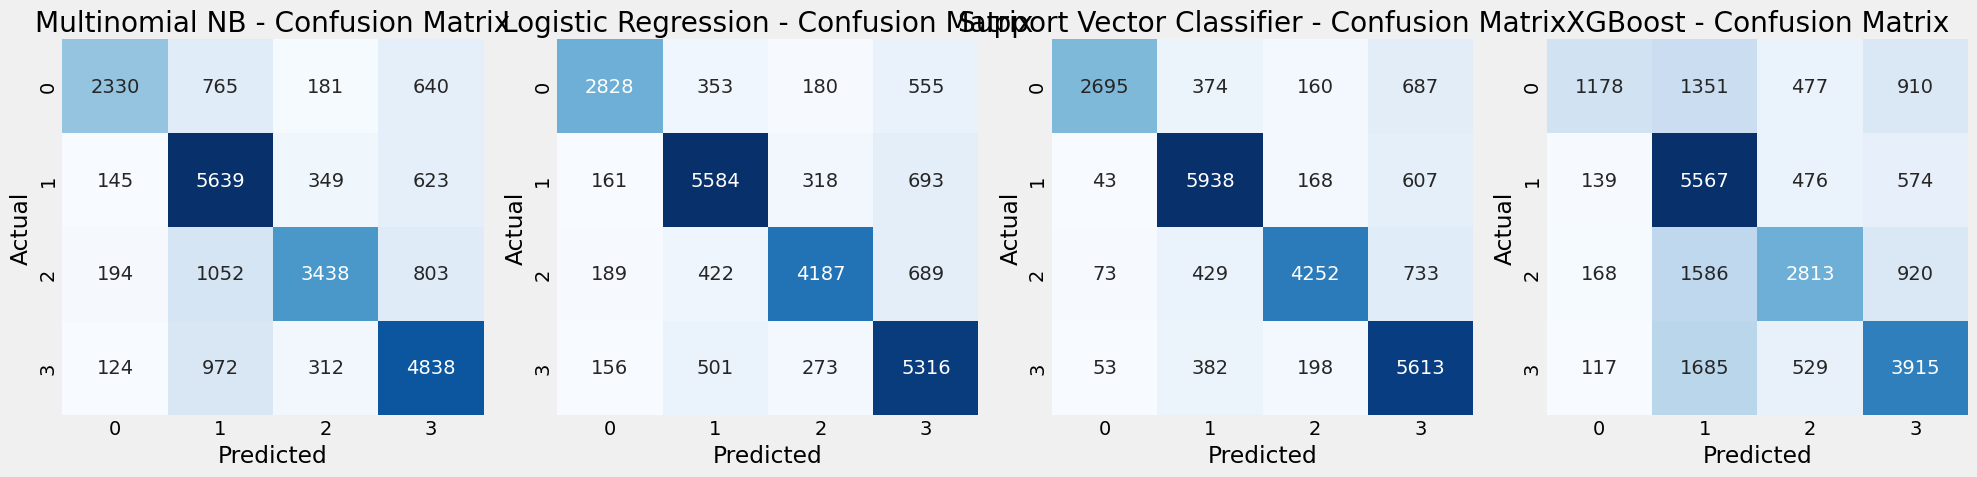

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder

# Encoder les étiquettes de classe
label_encoder = LabelEncoder()
y_train_split_encoded = label_encoder.fit_transform(y_train_split)
y_test_split_encoded = label_encoder.transform(y_test_split)

# Définir les modèles à évaluer
models = {
    "Multinomial NB": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Support Vector Classifier": SVC(),
    "XGBoost": XGBClassifier(eval_metric='mlogloss')  # Ajout de l'évaluation pour XGBoost
}

# Créer des sous-plots pour les matrices de confusion
fig, axes = plt.subplots(1, len(models), figsize=(20, 5))

# Boucle à travers chaque modèle
for ax, (model_name, model) in zip(axes, models.items()):
    # Convertir les données pour XGBoost
    if model_name == "XGBoost":
        X_train_np = X_train_split.toarray()
        X_test_np = X_test_split.toarray()
        y_train = y_train_split_encoded
        y_test = y_test_split_encoded
    else:
        X_train_np = X_train_split
        X_test_np = X_test_split
        y_train = y_train_split
        y_test = y_test_split

    # Entraîner le modèle
    model.fit(X_train_np, y_train)

    # Prédictions
    y_pred = model.predict(X_test_np)

    # Évaluation du modèle
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f'{model_name} - Accuracy: {accuracy:.2f}, Precision: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1:.2f}')

    # Calculer la matrice de confusion
    cm = confusion_matrix(y_test, y_pred)

    # Tracer la matrice de confusion comme un heatmap
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, ax=ax)

    # Définir les titres et les labels pour le plot
    ax.set_title(f"{model_name} - Confusion Matrix")
    ax.set_xlabel("Predicted")
    ax.set_ylabel("Actual")

# Ajuster la mise en page et afficher le plot
plt.tight_layout()
plt.show()
